**PS7**

**1. Multinomial logistic regression and cross validation**

In [4]:
import pandas as pd
wine = pd.read_csv("strongdrink.txt")
wine.head()

,cultivar,alco,malic,ash,alk,magn,tot_phen,flav,nonfl_phen,proanth,color_int,hue,OD280rat,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [5]:
wine.cultivar.value_counts()

2    71
1    59
3    46
Name: cultivar, dtype: int64

**(a)**

In [7]:
import numpy as np
import sklearn
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.metrics import classification_report
from pylab import rcParams

X = wine[["alco","malic","tot_phen","color_int"]]
y = wine["cultivar"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=20) 

mtlg = LogisticRegression(solver='newton-cg',multi_class='multinomial').fit(X_train, y_train)
pd.DataFrame({"j=1":np.append(mtlg.intercept_[0],mtlg.coef_[0]),
              "j=2":np.append(mtlg.intercept_[1],mtlg.coef_[1])},
               index=["b0","b1",'b2','b3','b4'])

,j=1,j=2
b0,-24.010989,22.802446
b1,1.700403,-1.468044
b2,-0.265605,-0.333053
b3,1.223894,0.664012
b4,0.022756,-0.922712


In [8]:
y_pred = mtlg.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.87      1.00      0.93        13
           2       1.00      0.90      0.95        21
           3       1.00      1.00      1.00        10

   micro avg       0.95      0.95      0.95        44
   macro avg       0.96      0.97      0.96        44
weighted avg       0.96      0.95      0.96        44



In [10]:
print("error rate of cultivar 1 is",1-0.87,"\n","error rate of cultivar 2 is",1-1,"\n","error rate of cultivar 3 is",1-1 )

error rate of cultivar 1 is 0.13 
 error rate of cultivar 2 is 0 
 error rate of cultivar 3 is 0


The model is best at predicting cultivar 1. It is not the one with the most observations.

In [16]:
N = len(y_test)
mse = np.sum(1-(y_test == y_pred))/N
print("Mean squared error is ",mse)

Mean squared error is  0.045454545454545456


**(b)**

In [18]:
from sklearn.model_selection import LeaveOneOut
# LeaveOneOut() function does not work well with pandas DataFrames
# Xvars and yvals are arrays, instead of DataFrame and Series
Xvars = wine[["alco","malic","tot_phen","color_int"]].values
yvals = wine["cultivar"].values
N_loo = Xvars.shape[0]
loo = LeaveOneOut()
loo.get_n_splits(Xvars)
MSE_vec = np.zeros(N_loo)

ytest_vec = np.zeros(X.shape[0])
ypred_vec = np.zeros(X.shape[0])

for train_index, test_index in loo.split(Xvars):
    X_train, X_test = Xvars[train_index], Xvars[test_index]
    y_train, y_test = yvals[train_index], yvals[test_index]
    ytest_vec[test_index]=y_test
    mtlg2 = LogisticRegression(solver='newton-cg',multi_class='multinomial').fit(X_train, y_train)
    y_pred = mtlg2.predict(X_test)
    ypred_vec[test_index] = y_pred
    MSE_vec[test_index] = 1-(y_test == y_pred)

MSE_loo = MSE_vec.mean()

print('test estimate MSE loocv=', MSE_loo)

test estimate MSE loocv= 0.07954545454545454


In [20]:
print(classification_report(ytest_vec, ypred_vec))

              precision    recall  f1-score   support

         1.0       0.90      0.93      0.92        59
         2.0       0.91      0.90      0.91        71
         3.0       0.96      0.93      0.95        46

   micro avg       0.92      0.92      0.92       176
   macro avg       0.92      0.92      0.92       176
weighted avg       0.92      0.92      0.92       176



In [23]:
print("error rate of cultivar 1 is",0.1,"\n","error rate of cultivar 2 is",0.09,"\n","error rate of cultivar 3 is",0.04 )

error rate of cultivar 1 is 0.1 
 error rate of cultivar 2 is 0.09 
 error rate of cultivar 3 is 0.04


Compared to those from part (a), the error rate for cultivar 1 decreases while the error rates for cultivar 2 and 3 increase.

**(c)**

In [25]:
from sklearn.model_selection import KFold
k=4
kf = KFold(n_splits=k, shuffle=True, random_state=10) 
kf.get_n_splits(Xvars)
MSE_vec_kf = np.zeros(k)

ytest_vec_kf = np.zeros(X.shape[0])
ypred_vec_kf = np.zeros(X.shape[0])

k_ind = int(0)
for train_index, test_index in kf.split(Xvars):
    print('k index=', k_ind)
    X_train, X_test = Xvars[train_index], Xvars[test_index]
    y_train, y_test = yvals[train_index], yvals[test_index]
    ytest_vec_kf[test_index]=y_test
    mtlg3 = LogisticRegression(solver='newton-cg',multi_class='multinomial').fit(X_train, y_train)
    y_pred = mtlg3.predict(X_test)
    ypred_vec_kf[test_index]=y_pred
    MSE_vec_kf[k_ind] = (1-(y_test == y_pred)).mean()
    print('MSE for test set', k_ind, ' is', MSE_vec_kf[k_ind])
    k_ind += 1

MSE_kf = MSE_vec_kf.mean()
print('test estimate MSE k-fold=', MSE_kf)

k index= 0
MSE for test set 0  is 0.1590909090909091
k index= 1
MSE for test set 1  is 0.11363636363636363
k index= 2
MSE for test set 2  is 0.045454545454545456
k index= 3
MSE for test set 3  is 0.045454545454545456
test estimate MSE k-fold= 0.09090909090909091


In [27]:
print(classification_report(ytest_vec_kf, ypred_vec_kf))

              precision    recall  f1-score   support

         1.0       0.87      0.93      0.90        59
         2.0       0.91      0.87      0.89        71
         3.0       0.96      0.93      0.95        46

   micro avg       0.91      0.91      0.91       176
   macro avg       0.91      0.91      0.91       176
weighted avg       0.91      0.91      0.91       176



In [28]:
print("error rate of cultivar 1 is",0.13,"\n","error rate of cultivar 2 is",0.09,"\n","error rate of cultivar 3 is",0.04 )

error rate of cultivar 1 is 0.13 
 error rate of cultivar 2 is 0.09 
 error rate of cultivar 3 is 0.04


Compared to those from part (a) and part (b), the error rate for cultivar 1 of part (c) is the same as that of part (a) but larger than that of part (b) while the error rates for cultivar 2 and 3 are the same as those from part (b) but larger than those of part (a).

**2. Splines and interpolation** 

In [32]:
cool = pd.read_csv("coolindex.txt",names=["age","value"])
cool.head()

,age,value
0,11.0,10.981602
1,11.0,11.364925
2,11.0,10.190227
3,11.0,9.903725
4,11.0,8.997918


**(a)**

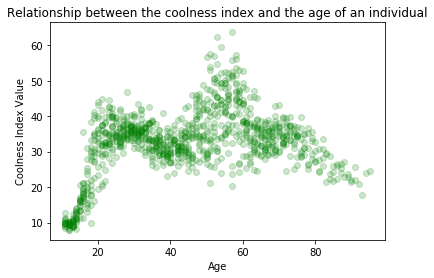

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(cool["age"],cool["value"],alpha=0.2,color="green")
plt.xlabel("Age")
plt.ylabel("Coolness Index Value")
plt.title("Relationship between the coolness index and the age of an individual")
plt.show()

**(b)**

In [38]:
import statsmodels.api as sm
g1 = cool.value[(cool.age>=11) & (cool.age<22)]
g2 = cool.value[(cool.age>=22) & (cool.age<40)]
g3 = cool.value[(cool.age>=40) & (cool.age<59)]
g4 = cool.value[(cool.age>=59) & (cool.age<77)]
g5 = cool.value[(cool.age>=77) & (cool.age<95)]
params = []
i=1
for g in [g1,g2,g3,g4,g5]:
    X = np.ones(g.shape[0]).reshape(-1,1)
    model = sm.OLS(g, X)
    result = model.fit()
    print("g",i,":",result.params[0])
    i=i+1
    params.append(result.params[0])

g 1 : 20.102457252090748
g 2 : 34.475788077559386
g 3 : 37.635105492449604
g 4 : 35.22540004024275
g 5 : 27.34816695276686


The predicted coolness of a 73-year old from the stepwise function is around 35.23.

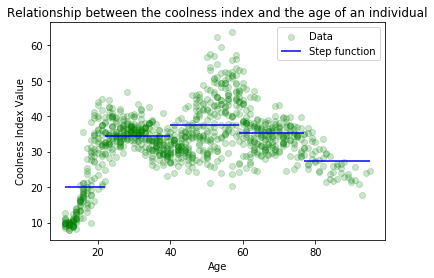

In [47]:
plt.scatter(cool["age"],cool["value"],alpha=0.2,color="green",label="Data")
plt.xlabel("Age")
plt.ylabel("Coolness Index Value")
plt.title("Relationship between the coolness index and the age of an individual")
x_min = np.array([11, 22, 40, 59, 77])
x_max = np.array([22, 40, 59, 77, 95])
plt.hlines(params, x_min, x_max, color='blue', label='Step function')
plt.legend(loc='upper right')
plt.show()

**(c)**

In [48]:
from scipy.interpolate import LSQUnivariateSpline
t = np.array([22.0,40.0,59, 77.0])
cool.sort_index(0, ascending=True, inplace=True)
cool_gp = cool.groupby('age', as_index = False).mean()
lsq = LSQUnivariateSpline(cool_gp.age.values, cool_gp.value.values, t, k=1)
age_new = np.linspace(11,95,1000)

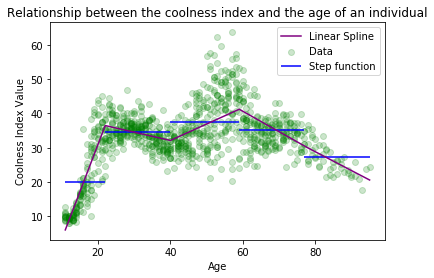

In [49]:
plt.scatter(cool["age"],cool["value"],alpha=0.2,color="green",label="Data")
plt.xlabel("Age")
plt.ylabel("Coolness Index Value")
plt.title("Relationship between the coolness index and the age of an individual")
x_min = np.array([11, 22, 40, 59, 77])
x_max = np.array([22, 40, 59, 77, 95])
plt.hlines(params, x_min, x_max, color='blue', label='Step function')
plt.plot(age_new, lsq(age_new), color='purple', label='Linear Spline')
plt.legend(loc='upper right')
plt.show()

In [54]:
print("the predicted coolness of a 73-year old from the linear spline is around",lsq(73))

the predicted coolness of a 73-year old from the linear spline is around 32.86784862349653


**(d)**

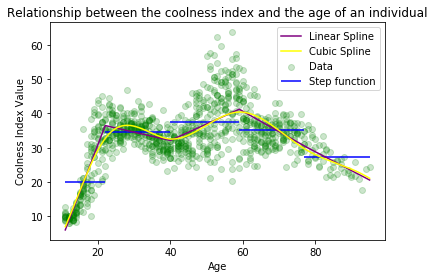

In [59]:
cb = LSQUnivariateSpline(cool_gp.age.values, cool_gp.value.values, t, k=3)
plt.scatter(cool["age"],cool["value"],alpha=0.2,color="green",label="Data")
plt.xlabel("Age")
plt.ylabel("Coolness Index Value")
plt.title("Relationship between the coolness index and the age of an individual")
x_min = np.array([11, 22, 40, 59, 77])
x_max = np.array([22, 40, 59, 77, 95])
plt.hlines(params, x_min, x_max, color='blue', label='Step function')
plt.plot(age_new, lsq(age_new), color='purple', label='Linear Spline')
plt.plot(age_new, cb(age_new), color='yellow', label='Cubic Spline')
plt.legend(loc='upper right')
plt.show()

In [60]:
print("the predicted coolness of a 73-year old from the cubic spline is around",cb(73))

the predicted coolness of a 73-year old from the cubic spline is around 32.642301066279764
